In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
path= '/gdrive/My Drive/Lemalabs/Assignments/data/'
train_data= pd.read_csv(path + 'Chennai_house_price_multivariate_train.csv')
test_data = pd.read_csv(path + 'Chennai_house_price_multivariate_test.csv')

In [ ]:
train_data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [ ]:
train_data.tail()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,15-01-1962,Others,ELO,No Access,RM,3.0,2.2,2.4,2.52,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,11-04-1995,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.92,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.84,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.16,425350,119098,8507000
7108,P09794,Velachery,1896,13-07-2005,156,3.0,2.0,5,Partial,Yes,24-07-1961,Others,ELO,Paved,I,3.1,3.5,4.3,3.64,349177,79812,9976480


In [ ]:
train_data.isnull().sum(axis=0)

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [ ]:
train_data = train_data.fillna({'N_BEDROOM' : train_data['N_BEDROOM'].mean(),'N_BATHROOM' : train_data['N_BATHROOM'].mean(),'QS_OVERALL' : train_data['QS_OVERALL'].mean()})

In [ ]:
train_data.isnull().sum(axis=0)

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [ ]:
train_data.shape

(7109, 22)

In [ ]:
output = train_data['SALES_PRICE']
output = np.array(output)
output = output.reshape(-1,1)
output.shape

(7109, 1)

In [ ]:
training_input = train_data.drop(columns = ['PRT_ID','DATE_SALE','SALES_PRICE', 'DATE_BUILD'])
training_input.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063


In [ ]:
training_input.tail()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS
7104,Karapakkam,598,51,1.0,1.0,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.52,208767,107060
7105,Velachery,1897,52,3.0,2.0,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.92,346191,205551
7106,Velachery,1614,152,2.0,1.0,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.84,317354,167028
7107,Karapakkam,787,40,1.0,1.0,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.16,425350,119098
7108,Velachery,1896,156,3.0,2.0,5,Partial,Yes,Others,ELO,Paved,I,3.1,3.5,4.3,3.64,349177,79812


In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
training_input["AREA"] = labelencoder.fit_transform(training_input["AREA"])
training_input["SALE_COND"] = labelencoder.fit_transform(training_input["SALE_COND"])
training_input["PARK_FACIL"] = labelencoder.fit_transform(training_input["PARK_FACIL"])
training_input["BUILDTYPE"] = labelencoder.fit_transform(training_input["BUILDTYPE"])
training_input["UTILITY_AVAIL"] = labelencoder.fit_transform(training_input["UTILITY_AVAIL"])
training_input["STREET"] = labelencoder.fit_transform(training_input["STREET"])
training_input["MZZONE"] = labelencoder.fit_transform(training_input["MZZONE"])

In [ ]:
training_input.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS
0,12,1004,131,1.0,1.0,3,1,2,0,1,4,0,4.0,3.9,4.9,4.330,380000,144400
1,4,1986,26,2.0,1.0,5,1,0,0,1,0,3,4.9,4.2,2.5,3.765,760122,304049
2,0,909,70,1.0,1.0,3,1,2,0,2,0,4,4.1,3.8,2.2,3.090,421094,92114
3,15,1855,14,3.0,2.0,5,4,0,2,4,4,2,4.7,3.9,3.6,4.010,356321,77042
4,12,1226,84,1.0,1.0,3,1,2,2,1,0,1,3.0,2.5,4.1,3.290,237000,74063


In [ ]:
training_input.tail()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS
7104,12,598,51,1.0,1.0,2,3,0,2,2,1,5,3.0,2.2,2.4,2.52,208767,107060
7105,15,1897,52,3.0,2.0,5,4,2,2,3,1,3,3.6,4.5,3.3,3.92,346191,205551
7106,15,1614,152,2.0,1.0,4,5,0,1,3,0,2,4.3,4.2,2.9,3.84,317354,167028
7107,12,787,40,1.0,1.0,2,7,2,0,2,4,4,4.6,3.8,4.1,4.16,425350,119098
7108,15,1896,156,3.0,2.0,5,7,2,2,2,4,2,3.1,3.5,4.3,3.64,349177,79812


In [ ]:
training_input.shape, output.shape

((7109, 18), (7109, 1))

In [ ]:
fsdata=(training_input-training_input.mean())/(training_input.max()-training_input.min())
fsoutput= (output-output.mean())/(output.max()-output.min())

In [ ]:
fsdata.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS
0,0.208011,-0.189037,0.156984,-0.212343,-0.21326,-0.172176,-0.375721,0.495288,-0.500492,-0.378042,0.56745,-0.663469,0.160843,0.130919,0.471567,0.278366,0.003354,0.006922
1,-0.291989,0.301963,-0.368016,0.120990,-0.21326,0.327824,-0.375721,-0.504712,-0.500492,-0.378042,-0.43255,-0.063469,0.460843,0.230919,-0.328433,0.088130,0.419815,0.332504
2,-0.541989,-0.236537,-0.148016,-0.212343,-0.21326,-0.172176,-0.375721,0.495288,-0.500492,-0.128042,-0.43255,0.136531,0.194176,0.097585,-0.428433,-0.139143,0.048377,-0.099708
3,0.395511,0.236463,-0.428016,0.454324,0.78674,0.327824,-0.000721,-0.504712,0.499508,0.371958,0.56745,-0.263469,0.394176,0.130919,0.038233,0.170622,-0.022588,-0.130445
4,0.208011,-0.078037,-0.078016,-0.212343,-0.21326,-0.172176,-0.375721,0.495288,0.499508,-0.378042,-0.43255,-0.463469,-0.172490,-0.335748,0.204900,-0.071803,-0.153316,-0.136520


In [ ]:
fsdata.tail()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS
7104,0.208011,-0.392037,-0.243016,-0.212343,-0.21326,-0.422176,-0.125721,-0.504712,0.499508,-0.128042,-0.18255,0.336531,-0.172490,-0.435748,-0.361767,-0.331062,-0.184248,-0.069228
7105,0.395511,0.257463,-0.238016,0.454324,0.78674,0.327824,-0.000721,0.495288,0.499508,0.121958,-0.18255,-0.063469,0.027510,0.330919,-0.061767,0.140319,-0.033687,0.131631
7106,0.395511,0.115963,0.261984,0.120990,-0.21326,0.077824,0.124279,-0.504712,-0.000492,0.121958,-0.43255,-0.263469,0.260843,0.230919,-0.195100,0.113383,-0.065280,0.053069
7107,0.208011,-0.297537,-0.298016,-0.212343,-0.21326,-0.422176,0.374279,0.495288,-0.500492,-0.128042,0.56745,0.136531,0.360843,0.097585,0.204900,0.221127,0.053040,-0.044678
7108,0.395511,0.256963,0.281984,0.454324,0.78674,0.327824,0.374279,0.495288,0.499508,-0.128042,0.56745,-0.263469,-0.139157,-0.002415,0.271567,0.046042,-0.030415,-0.124796


In [ ]:
x= fsdata
y= fsoutput

In [ ]:
x.insert(0,'Bias',1)

In [ ]:
x.head()

,Bias,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS
0,1,0.208011,-0.189037,0.156984,-0.212343,-0.21326,-0.172176,-0.375721,0.495288,-0.500492,-0.378042,0.56745,-0.663469,0.160843,0.130919,0.471567,0.278366,0.003354,0.006922
1,1,-0.291989,0.301963,-0.368016,0.120990,-0.21326,0.327824,-0.375721,-0.504712,-0.500492,-0.378042,-0.43255,-0.063469,0.460843,0.230919,-0.328433,0.088130,0.419815,0.332504
2,1,-0.541989,-0.236537,-0.148016,-0.212343,-0.21326,-0.172176,-0.375721,0.495288,-0.500492,-0.128042,-0.43255,0.136531,0.194176,0.097585,-0.428433,-0.139143,0.048377,-0.099708
3,1,0.395511,0.236463,-0.428016,0.454324,0.78674,0.327824,-0.000721,-0.504712,0.499508,0.371958,0.56745,-0.263469,0.394176,0.130919,0.038233,0.170622,-0.022588,-0.130445
4,1,0.208011,-0.078037,-0.078016,-0.212343,-0.21326,-0.172176,-0.375721,0.495288,0.499508,-0.378042,-0.43255,-0.463469,-0.172490,-0.335748,0.204900,-0.071803,-0.153316,-0.136520


In [ ]:
x.tail()

,Bias,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS
7104,1,0.208011,-0.392037,-0.243016,-0.212343,-0.21326,-0.422176,-0.125721,-0.504712,0.499508,-0.128042,-0.18255,0.336531,-0.172490,-0.435748,-0.361767,-0.331062,-0.184248,-0.069228
7105,1,0.395511,0.257463,-0.238016,0.454324,0.78674,0.327824,-0.000721,0.495288,0.499508,0.121958,-0.18255,-0.063469,0.027510,0.330919,-0.061767,0.140319,-0.033687,0.131631
7106,1,0.395511,0.115963,0.261984,0.120990,-0.21326,0.077824,0.124279,-0.504712,-0.000492,0.121958,-0.43255,-0.263469,0.260843,0.230919,-0.195100,0.113383,-0.065280,0.053069
7107,1,0.208011,-0.297537,-0.298016,-0.212343,-0.21326,-0.422176,0.374279,0.495288,-0.500492,-0.128042,0.56745,0.136531,0.360843,0.097585,0.204900,0.221127,0.053040,-0.044678
7108,1,0.395511,0.256963,0.281984,0.454324,0.78674,0.327824,0.374279,0.495288,0.499508,-0.128042,0.56745,-0.263469,-0.139157,-0.002415,0.271567,0.046042,-0.030415,-0.124796


In [ ]:
x.shape, y.shape

((7109, 19), (7109, 1))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [ ]:
x_train = np.matrix(x_train)
y_train = np.matrix(y_train)

In [ ]:
theta = np.matrix(np.zeros(19))

In [ ]:
theta.shape, x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1, 19), (5331, 19), (5331, 1), (1778, 19), (1778, 1))

In [ ]:
def computeError(x,y,theta):
  inner = np.power(((x*theta.T)-y),2)
  return np.sum(inner)/(2*len(x))

In [ ]:
computeError(x_train,y_train,theta)

0.015435940982752881

In [ ]:
learning_rate = 0.1
iterations = 50000
def gradientDescent(x,y,theta,learning_rate,iterations):
  mt = np.matrix(np.zeros(theta.shape))   
  parameters = theta.shape[1]        
  cost = []            

  for i in range(iterations):      
    error = (x*theta.T)-y     

    for j in range(parameters): 
      gradient = np.multiply(error,x[:,j])
      mt[0,j]= theta[0,j] - ((learning_rate/len(x))*np.sum(gradient))      

    theta= mt   
    
    cost_iter = computeError(x,y,theta) 

    cost.append(cost_iter) 
    
  return theta,cost

In [ ]:
new_theta,cost = gradientDescent(x_train,y_train,theta,learning_rate,iterations)

In [ ]:
print(new_theta)

[[ 3.83293518e-06 -6.31740773e-02  8.04414503e-02  2.37685908e-03
  -1.67653019e-01 -4.87421682e-02  2.97735194e-01 -1.20818896e-02
   2.43079867e-02 -9.20316400e-02 -1.01998807e-02 -8.94541625e-03
   9.16828809e-02 -6.05675172e-03 -1.00031310e-02 -9.39934926e-03
   3.56130789e-02  5.54069216e-01  7.51018002e-02]]


In [ ]:
print(cost)

[0.015015616304888638, 0.014612798450905741, 0.014226633290075964, 0.01385631246644907, 0.013501070786581094, 0.013160183766817699, 0.012832965329063823, 0.01251876563495435, 0.01221696904920259, 0.011926992223663698, 0.01164828229432451, 0.01138031518403187, 0.011122594004310041, 0.010874647550102218, 0.010636028881709385, 0.010406313988597593, 0.010185100530107493, 0.009972006648431786, 0.009766669849530864, 0.00956874594793736, 0.00937790807165915, 0.009193845723629863, 0.00901626389637808, 0.008844882236792615, 0.008679434258053379, 0.00851966659597614, 0.00836533830718647, 0.00821622020669415, 0.008072094242585086, 0.007932752905684366, 0.007797998672171824, 0.007667643477251414, 0.00754150821808798, 0.00741942228433051, 0.007301223114639904, 0.0071867557777322046, 0.0070758725765356365, 0.006968432674141719, 0.006864301740307951, 0.00676335161734192, 0.006665460004265006, 0.00657051015821784, 0.006478390612129984, 0.006388994907733127, 0.006302221343050317, 0.00621797273354409, 0

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Error Vs Iterations')

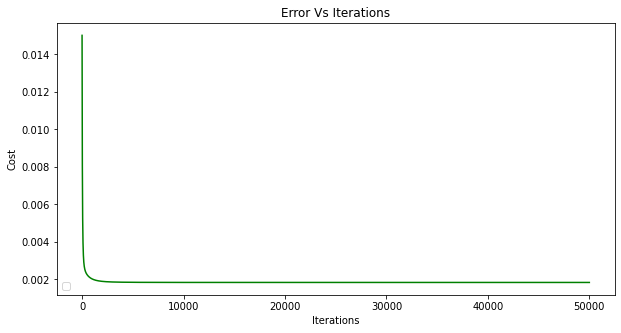

In [ ]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(np.arange(iterations),cost,'g')
ax.legend(loc=3)
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error Vs Iterations')

In [ ]:
training_model=  x_train * new_theta.T

In [ ]:
x_test= np.matrix(x_test)
y_test= np.matrix(y_test)
test_model= x_test * new_theta.T

In [ ]:
from sklearn.metrics import mean_absolute_error

Error_train = mean_absolute_error(training_model, y_train)
Error_test = mean_absolute_error(test_model, y_test)
Accuracy_train = 1 - Error_train
Accuracy_test = 1 - Error_test

print('Train Error = {} %'.format((round(Error_train*100,2))))
print('Train Accuracy = {} %'.format((round(Accuracy_train*100,2))))

print('Test Error = {} %'.format((round(Error_test*100,2))))
print('Test Accuracy = {} %'.format((round(Accuracy_test*100,2))))

Train Error = 4.87 %
Train Accuracy = 95.13 %
Test Error = 4.76 %
Test Accuracy = 95.24 %


In [ ]:
test_data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS
0,P05996,Chrompet,958,13-11-2009,185,1,1,3,AbNormal,No,20-11-1982,Others,NoSewr,Paved,RH,3.1,4.4,3.9,3.860,203260,93813
1,P09294,Anna Nagar,1807,29-01-2007,108,2,1,5,AdjLand,Yes,02-02-1990,Others,NoSeWa,No Access,RM,2.6,4.1,2.1,2.775,370410,222246
2,P03807,Karapakkam,1658,07-01-2011,59,2,2,4,AdjLand,No,11-01-1995,Others,NoSeWa,Paved,I,2.5,2.3,3.2,2.720,387972,113159
3,P00539,Anna Nagar,1592,22-01-2014,102,1,1,4,AbNormal,Yes,27-01-1995,Others,AllPub,Gravel,RL,4.1,4.8,2.5,3.635,408134,84442
4,P01448,Chrompet,857,01-05-2012,62,1,1,3,Family,No,10-05-1978,House,ELO,Gravel,RH,3.0,4.5,2.9,3.570,181212,34849


In [ ]:
test_data.tail()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS
2920,P01065,T Nagar,1784,16-01-2013,7,1,1,4,AbNormal,Yes,25-01-1980,House,AllPub,No Access,RH,2.8,3.5,2.7,2.930,404898,95270
2921,P08603,Adyar,1074,25-10-2007,24,1,1,3,Family,No,02-11-1974,Others,AllPub,Paved,RL,4.7,2.7,4.6,4.250,300022,84381
2922,P00474,Anna Nagar,1548,17-03-2014,71,1,1,4,Normal Sale,Yes,19-03-2006,Commercial,ELO,No Access,RL,3.0,2.9,3.2,3.055,453935,326833
2923,P08173,Velachery,1527,01-04-2008,44,2,1,4,Normal Sale,Yes,15-04-1954,Commercial,NoSewr,Gravel,RM,3.0,4.1,4.9,4.070,511572,315971
2924,P00643,Chrompet,1089,11-11-2013,94,1,1,3,Partial,No,21-11-1973,Commercial,NoSewr,Gravel,RM,2.0,2.4,3.4,2.580,417101,208550


In [ ]:
test_data.isnull().sum(axis=0)

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         0
N_BATHROOM        0
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       19
REG_FEE           0
COMMIS            0
dtype: int64

In [ ]:
test_data = test_data.fillna({'QS_OVERALL' : test_data['QS_OVERALL'].mean()})

In [ ]:
test_data.isnull().sum(axis=0)

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
dtype: int64

In [ ]:
test_input = test_data.drop(columns = ['PRT_ID','DATE_SALE','DATE_BUILD'])
test_input.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS
0,Chrompet,958,185,1,1,3,AbNormal,No,Others,NoSewr,Paved,RH,3.1,4.4,3.9,3.860,203260,93813
1,Anna Nagar,1807,108,2,1,5,AdjLand,Yes,Others,NoSeWa,No Access,RM,2.6,4.1,2.1,2.775,370410,222246
2,Karapakkam,1658,59,2,2,4,AdjLand,No,Others,NoSeWa,Paved,I,2.5,2.3,3.2,2.720,387972,113159
3,Anna Nagar,1592,102,1,1,4,AbNormal,Yes,Others,AllPub,Gravel,RL,4.1,4.8,2.5,3.635,408134,84442
4,Chrompet,857,62,1,1,3,Family,No,House,ELO,Gravel,RH,3.0,4.5,2.9,3.570,181212,34849


In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
test_input["AREA"] = labelencoder.fit_transform(test_input["AREA"])
test_input["SALE_COND"] = labelencoder.fit_transform(test_input["SALE_COND"])
test_input["PARK_FACIL"] = labelencoder.fit_transform(test_input["PARK_FACIL"])
test_input["BUILDTYPE"] = labelencoder.fit_transform(test_input["BUILDTYPE"])
test_input["UTILITY_AVAIL"] = labelencoder.fit_transform(test_input["UTILITY_AVAIL"])
test_input["STREET"] = labelencoder.fit_transform(test_input["STREET"])
test_input["MZZONE"] = labelencoder.fit_transform(test_input["MZZONE"])

In [ ]:
test_input.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS
0,5,958,185,1,1,3,0,0,2,4,3,3,3.1,4.4,3.9,3.860,203260,93813
1,2,1807,108,2,1,5,2,2,2,3,1,5,2.6,4.1,2.1,2.775,370410,222246
2,9,1658,59,2,2,4,2,0,2,3,3,2,2.5,2.3,3.2,2.720,387972,113159
3,2,1592,102,1,1,4,0,2,2,1,0,4,4.1,4.8,2.5,3.635,408134,84442
4,5,857,62,1,1,3,3,0,1,2,0,3,3.0,4.5,2.9,3.570,181212,34849


In [ ]:
fsdata1=(test_input-test_input.mean())/(test_input.max()-test_input.min())

In [ ]:
fsdata1.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS
0,-0.114017,-0.21789,0.43952,-0.217436,-0.220513,-0.180769,-0.427497,-0.503419,0.496239,0.373162,0.558291,-0.078154,-0.139168,0.307863,0.132239,0.121862,-0.188067,-0.091455
1,-0.364017,0.20661,0.05452,0.115897,-0.220513,0.319231,-0.141783,0.496581,0.496239,0.123162,-0.108376,0.321846,-0.305835,0.207863,-0.467761,-0.250990,-0.011860,0.160624
2,0.219316,0.13211,-0.19048,0.115897,0.779487,0.069231,-0.141783,-0.503419,0.496239,0.123162,0.558291,-0.278154,-0.339168,-0.392137,-0.101094,-0.269891,0.006654,-0.053484
3,-0.364017,0.09911,0.02452,-0.217436,-0.220513,0.069231,-0.427497,0.496581,0.496239,-0.376838,-0.441709,0.121846,0.194165,0.441197,-0.334427,0.044542,0.027909,-0.109848
4,-0.114017,-0.26839,-0.17548,-0.217436,-0.220513,-0.180769,0.001074,-0.503419,-0.003761,-0.126838,-0.441709,-0.078154,-0.172501,0.341197,-0.201094,0.022206,-0.211310,-0.207186


In [ ]:
x_test1 = fsdata1

In [ ]:
x_test1.insert(0,'Bias',0)

In [ ]:
x_test1.head()

,Bias,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS
0,0,-0.114017,-0.21789,0.43952,-0.217436,-0.220513,-0.180769,-0.427497,-0.503419,0.496239,0.373162,0.558291,-0.078154,-0.139168,0.307863,0.132239,0.121862,-0.188067,-0.091455
1,0,-0.364017,0.20661,0.05452,0.115897,-0.220513,0.319231,-0.141783,0.496581,0.496239,0.123162,-0.108376,0.321846,-0.305835,0.207863,-0.467761,-0.250990,-0.011860,0.160624
2,0,0.219316,0.13211,-0.19048,0.115897,0.779487,0.069231,-0.141783,-0.503419,0.496239,0.123162,0.558291,-0.278154,-0.339168,-0.392137,-0.101094,-0.269891,0.006654,-0.053484
3,0,-0.364017,0.09911,0.02452,-0.217436,-0.220513,0.069231,-0.427497,0.496581,0.496239,-0.376838,-0.441709,0.121846,0.194165,0.441197,-0.334427,0.044542,0.027909,-0.109848
4,0,-0.114017,-0.26839,-0.17548,-0.217436,-0.220513,-0.180769,0.001074,-0.503419,-0.003761,-0.126838,-0.441709,-0.078154,-0.172501,0.341197,-0.201094,0.022206,-0.211310,-0.207186


In [ ]:
x_test1= np.matrix(x_test1)
test_model= x_test1 * new_theta.T
print(test_model)

[[0.13380645]
 [0.04060229]
 [0.10695164]
 ...
 [0.17445111]
 [0.19217758]
 [0.09220153]]


In [ ]:
y_test1 = (test_model*(output.max()-output.min()))+ output.mean()

In [ ]:
print(y_test1.round())

[[13773149.]
 [11768284.]
 [13195489.]
 ...
 [14647434.]
 [15028739.]
 [12878207.]]


In [ ]:
path = '/gdrive/My Drive/Lemalabs/Participants/Revanth Krishna/Week_3/'
np.savetxt(path + "/house_price_pred.csv",y_test1.round(), delimiter=",")